In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
photo1 = cv2.imread("img.jpg")


Repo: https://github.com/antara021/LBPandLDP

In [9]:
def ldp(photo):
  import cv2 
  import numpy as np 
  def assign_bit(picture, x, y, c1,c2,d):  #assign bit according to degree and neighbouring pixel
    #a and b are 1 if increasing and 0 if decreasing
    if (d==0):
      a = 0    
      b =0  
      try:
        if picture[c1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x][y+1] >= picture[x][y]:
          b= 1         
      except:
        pass
    if (d==45):
      a = 0    
      b =0  
      try:
        if picture[c1-1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y+1] >= picture[x][y]:
          b= 1
      except: 
        pass
    if (d==90):
      a = 0   
      b =0  
      try:
        if picture[c1-1][c2] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y] >= picture[x][y]:
          b= 1
      except:
        pass
    if (d==135):
      a = 0    
      b =0 
      try:
        if picture[c1-1][c2-1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y-1] >= picture[x][y]:
          b= 1
      except:
        pass
    if (a==b): #if monotonically increasing or decreasing than 0
      return "0"
    else:      #if turning point 
      return "1"
    return bit
  def local_der_val(picture, x, y):  #calculating local derivative pattern value of a pixel
    thirtytwo_bit_binary = []
    centre = picture[x][y] 
    c1=x
    c2=y
    decimal_val = 0
    #starting from top left,assigning bit to pixels clockwise at 0 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,0 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,0)) 
    
    #starting from top left,assigning bit to pixels clockwise at 45 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,45)) 
    
    #starting from top left,assigning bit to pixels clockwise at 90 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,90 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,90)) 

    #starting from top left,assigning bit to pixels clockwise at 135 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,135)) 

    str1 = ""   
    l=str1.join(thirtytwo_bit_binary)#32 bit binary number
    decimal_val=int(l,2)   #32 bit binary to decimal number
    return decimal_val 
  m, n, _ = photo.shape 
  
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  # ldp_photo = np.zeros((m, n),np.uint8) 
  ldp_photo = np.zeros((m, n)) 
  # converting image to ldp
  for i in range(0,m): 
      for j in range(0,n): 
          ldp_photo[i, j] = local_der_val(gray_scale, i, j) 
 
  return ldp_photo
 

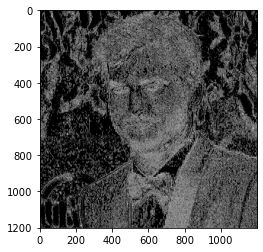

array([[5.50432298e+08, 1.21942385e+09, 2.22186264e+09, ...,
        3.22430117e+09, 3.09165640e+09, 5.08220000e+04],
       [2.16064027e+08, 5.18054115e+08, 4.05804669e+09, ...,
        1.47376320e+07, 9.55834592e+08, 6.37360000e+04],
       [3.80842822e+09, 3.22122560e+09, 2.68435456e+09, ...,
        0.00000000e+00, 9.43194112e+08, 1.43920000e+04],
       ...,
       [1.35007666e+08, 6.80300950e+07, 3.39512460e+07, ...,
        1.20264677e+09, 3.12521086e+09, 5.08860000e+04],
       [4.17820457e+08, 4.22647768e+09, 6.69078860e+07, ...,
        2.02839677e+09, 1.00629732e+09, 6.37400000e+04],
       [1.04847323e+09, 2.97074251e+09, 2.41276901e+09, ...,
        8.21038607e+08, 3.20858064e+09, 1.60650000e+04]])

In [10]:
l1=ldp(photo1)
plt.imshow(l1, cmap ="gray") 
plt.show() 
l1